In [1]:
import tensorflow as tf
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### 鸢尾花数据集读取

In [2]:
x_data=load_iris().data
y_data=load_iris().target

#### 打乱数据集

In [3]:
np.random.seed(116)
np.random.shuffle(x_data)
np.random.shuffle(y_data)
tf.random.set_seed(116)

##### 将数据拆分为训练测试集

In [4]:
x_train=x_data[:-30]
y_train=y_data[:-30]
x_test=x_data[-30:]
y_test=y_data[-30:]

##### 配成数据集

In [5]:
train_db=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

##### 设置神经网络中参数

epoch:0.loss:0.06281571090221405
test_acc:0.26666666666666666
epoch:1.loss:0.06134970858693123
test_acc:0.26666666666666666
epoch:2.loss:0.06024026870727539
test_acc:0.26666666666666666
epoch:3.loss:0.05938085541129112
test_acc:0.26666666666666666
epoch:4.loss:0.05870364233851433
test_acc:0.26666666666666666
epoch:5.loss:0.058164436370134354
test_acc:0.26666666666666666
epoch:6.loss:0.0577327162027359
test_acc:0.26666666666666666
epoch:7.loss:0.05738607421517372
test_acc:0.26666666666666666
epoch:8.loss:0.05710723623633385
test_acc:0.26666666666666666
epoch:9.loss:0.05688251554965973
test_acc:0.26666666666666666
epoch:10.loss:0.0567009299993515
test_acc:0.26666666666666666
epoch:11.loss:0.0565536692738533
test_acc:0.26666666666666666
epoch:12.loss:0.05643366277217865
test_acc:0.26666666666666666
epoch:13.loss:0.05633530393242836
test_acc:0.26666666666666666
epoch:14.loss:0.05625412240624428
test_acc:0.26666666666666666
epoch:15.loss:0.056186601519584656
test_acc:0.26666666666666666
epo

epoch:145.loss:0.05494483560323715
test_acc:0.26666666666666666
epoch:146.loss:0.0549408458173275
test_acc:0.26666666666666666
epoch:147.loss:0.05493689328432083
test_acc:0.26666666666666666
epoch:148.loss:0.05493297055363655
test_acc:0.26666666666666666
epoch:149.loss:0.054929088801145554
test_acc:0.26666666666666666
epoch:150.loss:0.05492524057626724
test_acc:0.26666666666666666
epoch:151.loss:0.054921429604291916
test_acc:0.26666666666666666
epoch:152.loss:0.05491764843463898
test_acc:0.26666666666666666
epoch:153.loss:0.05491390451788902
test_acc:0.3
epoch:154.loss:0.054910190403461456
test_acc:0.3
epoch:155.loss:0.054906513541936874
test_acc:0.3
epoch:156.loss:0.05490286648273468
test_acc:0.3
epoch:157.loss:0.054899249225854874
test_acc:0.3
epoch:158.loss:0.05489567294716835
test_acc:0.3
epoch:159.loss:0.054892126470804214
test_acc:0.3
epoch:160.loss:0.054888609796762466
test_acc:0.3
epoch:161.loss:0.0548851303756237
test_acc:0.3
epoch:162.loss:0.05488166585564613
test_acc:0.3
epo

test_acc:0.2
epoch:313.loss:0.054592207074165344
test_acc:0.2
epoch:314.loss:0.05459125339984894
test_acc:0.2
epoch:315.loss:0.05459030717611313
test_acc:0.2
epoch:316.loss:0.05458937585353851
test_acc:0.2
epoch:317.loss:0.0545884445309639
test_acc:0.2
epoch:318.loss:0.05458752438426018
test_acc:0.2
epoch:319.loss:0.054586611688137054
test_acc:0.2
epoch:320.loss:0.05458570271730423
test_acc:0.2
epoch:321.loss:0.0545848049223423
test_acc:0.2
epoch:322.loss:0.05458391085267067
test_acc:0.2
epoch:323.loss:0.054583027958869934
test_acc:0.2
epoch:324.loss:0.0545821487903595
test_acc:0.2
epoch:325.loss:0.054581280797719955
test_acc:0.2
epoch:326.loss:0.05458041653037071
test_acc:0.2
epoch:327.loss:0.054579559713602066
test_acc:0.2
epoch:328.loss:0.05457870662212372
test_acc:0.2
epoch:329.loss:0.054577864706516266
test_acc:0.2
epoch:330.loss:0.05457702651619911
test_acc:0.2
epoch:331.loss:0.054576195776462555
test_acc:0.2
epoch:332.loss:0.05457537621259689
test_acc:0.2
epoch:333.loss:0.054574

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


test_acc:0.2
epoch:499.loss:0.054498642683029175
test_acc:0.2


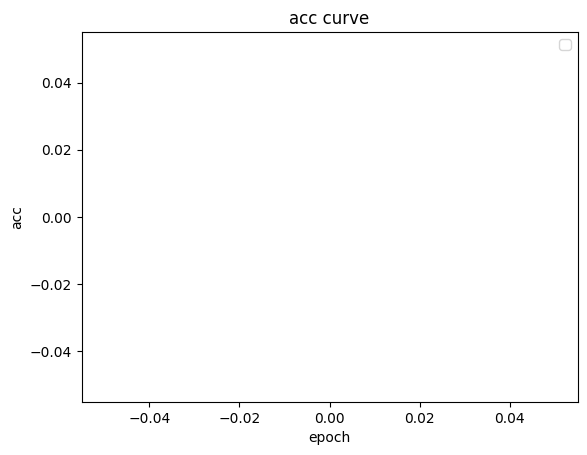

In [6]:
w=tf.Variable(tf.random.normal([4,3],stddev=0.1,seed=1))
b=tf.Variable(tf.random.normal([3],stddev=0.1,seed=1))

lr=0.01
train_loss_results=[]
test_acc=[]
loss_all=0
epochs=500
for epoch in range(epochs):
    for step,(x_train,y_train) in enumerate(train_db):
        with tf.GradientTape() as tape:
            x_train=tf.cast(x_train,dtype=w.dtype)
            y_train=tf.cast(y_train,dtype=tf.int32)
            y=tf.matmul(x_train,w)+b
            y=tf.nn.softmax(y)
            y_=tf.one_hot(y_train,depth=3)
            loss=tf.reduce_mean(tf.square(y_-y))
            loss_all=loss.numpy()
            #计算loss
        grads=tape.gradient(loss,[w,b])
        w.assign_sub(grads[0]*lr)
        b.assign_sub(grads[1]*lr)
    print("epoch:{}.loss:{}".format(epoch,loss_all/4))
    train_loss_results.append(loss_all/4)
    loss_all=0
    
    total_correct,total_number=0,0
    for x_test,y_test in test_db:
        x_test=tf.cast(x_test,dtype=w.dtype)
        y_test=tf.cast(y_test,dtype=tf.int32)
        y=tf.matmul(x_test,w)+b
        y=tf.nn.softmax(y)
        pred=tf.argmax(y,axis=1)
        pred=tf.cast(pred,dtype=y_test.dtype)
        correct=tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
        correct=tf.reduce_sum(correct)
        total_correct+=int(correct)
        total_number+=x_test.shape[0]
    acc=total_correct/total_number
    print("test_acc:{}".format(acc))

plt.title("loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(train_loss_results)
plt.legend()
plt.show()